In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(450, 338, 3)
(800, 1500, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

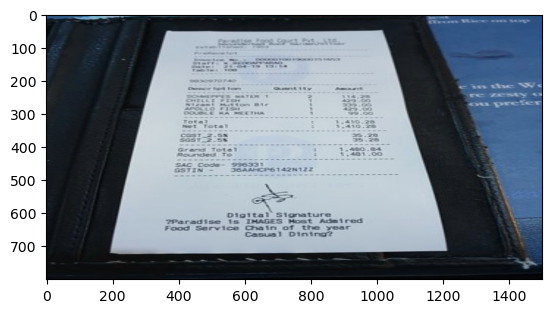

In [51]:
im_path = "./bill.jpg"

#read image from path
img = cv2.imread(im_path)

print(img.shape)

#Resize the image
img = cv2.resize(img,(1500,800))
#BGR fort : BGR -> RGB Normally opencv read image in BGR Format so need to convert to RGB
print(img.shape)

plt.imshow(img)
plt.show

* Remove the Noise
* Edge Detection
* Contour Extraction
* Best Contour Selection
* Project to the screen

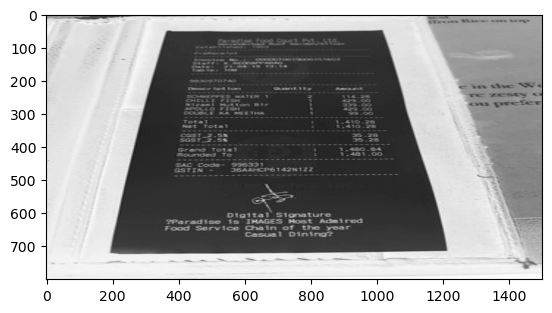

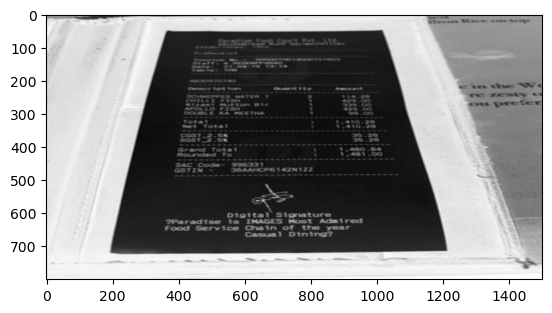

In [52]:
#remove the Noise

#Image Blurring

orig = img.copy()
gray = cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='binary')

plt.show()

blurred = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred,cmap = "binary")
plt.show()

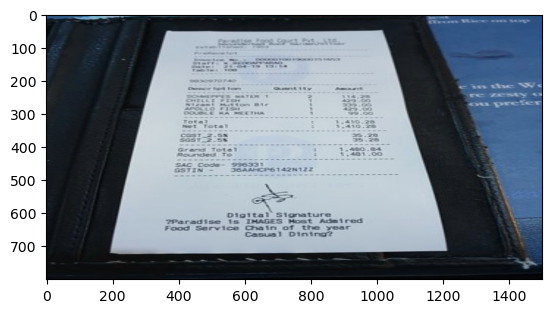

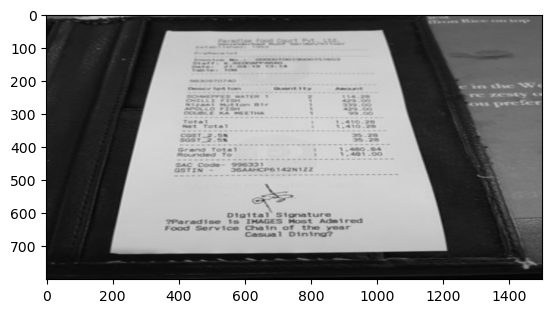

In [53]:
regen = cv2.cvtColor(blurred,cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()



In [5]:
regen.shape

(800, 1500, 3)

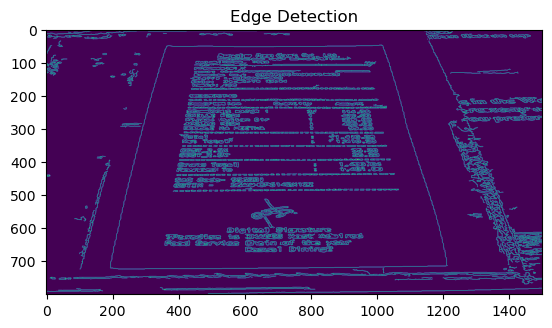

In [54]:
# Edge Detection

edge = cv2.Canny(blurred,0,50)
orig_edge = edge.copy()

plt.imshow(orig_edge)
plt.title("Edge Detection")
plt.show()

In [55]:
#Contours Extraction

contours, _ = cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted(contours,reverse = True, key = cv2.contourArea)

2160


In [56]:
# Select the best Contout Region

for c in contours:
    p = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.01*p,True)
    
    if len(approx) == 4:
        target = approx
        break
        
print(target.shape)

(4, 1, 2)


In [57]:
#Reorder target contor

def reorder(h):
    h = h.reshape((4,2))
    print(h)
    
    hnew = np.zeros((4,2),dtype = np.float32)
    
    add = h.sum(axis = 1)
    hnew[3] = h[np.argmax(add)]
    hnew[1] = h[np.argmax(add)]
    
    diff = np.diff(h,axis = 1)
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]
    
    return hnew
    

In [58]:
reorder = reorder(target)
print("******************")
print(reorder)

[[833 107]
 [955 106]
 [958 109]
 [834 110]]
******************
[[834. 110.]
 [958. 109.]
 [834. 110.]
 [958. 109.]]


In [59]:
#Project to a fixed screen

input_representation = reorder

output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [60]:
M = cv2.getPerspectiveTransform(input_representation,output_map)

ans = cv2.warpPerspective(orig,M,(800,800))

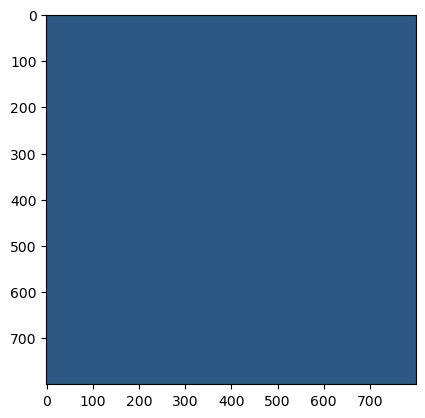

In [61]:
plt.imshow(ans)
plt.show()

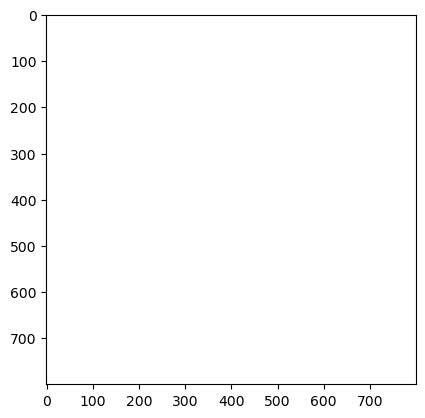

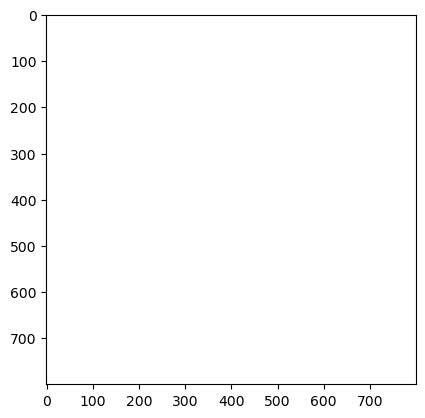

In [63]:
res = cv2.cvtColor(ans,cv2.COLOR_RGB2GRAY)

b_res  = cv2.GaussianBlur(res, (3,3),0)
plt.imshow(res,cmap = 'binary')
plt.show()

plt.imshow(b_res,cmap = 'binary')
plt.show()

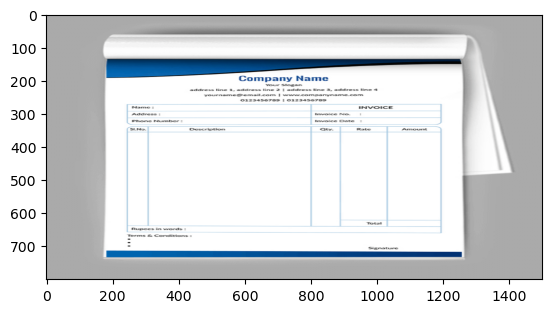

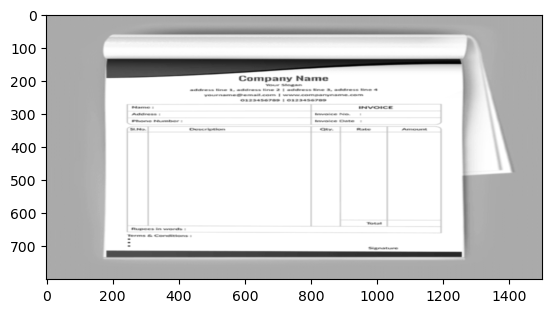

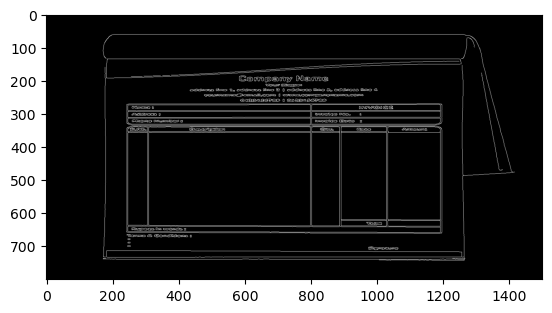

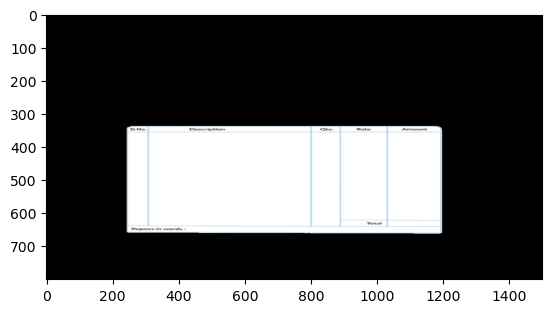

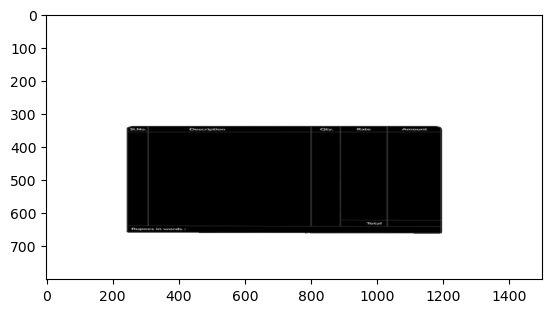

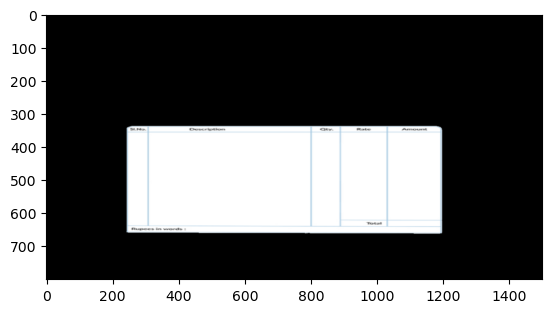

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

im_path = "./billl.jpg"

# Read image from path
img = cv2.imread(im_path)

# Resize the image
img = cv2.resize(img, (1500, 800))

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap="gray")
plt.show()

# Perform edge detection
edges = cv2.Canny(blurred, 30, 100)

plt.imshow(edges, cmap="gray")
plt.show()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Select the contour with the largest area
largest_contour = contours[0]

# Create a mask for the largest contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, [largest_contour], 0, 255, -1)

# Apply the mask to the original image
masked_img = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(masked_img)
plt.show()

res = cv2.cvtColor(masked_img,cv2.COLOR_RGB2GRAY)

b_res  = cv2.GaussianBlur(masked_img, (3,3),0)
plt.imshow(res,cmap = 'binary')
plt.show()

plt.imshow(b_res,cmap = 'binary')
plt.show()


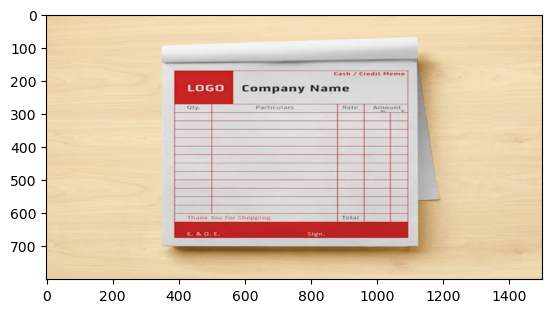

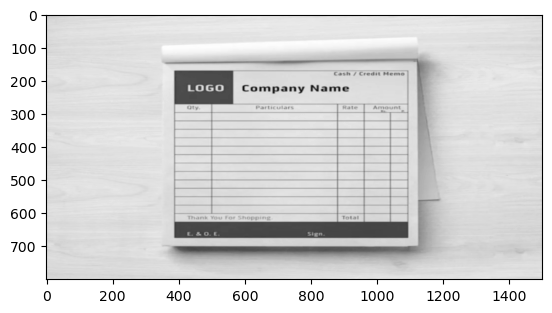

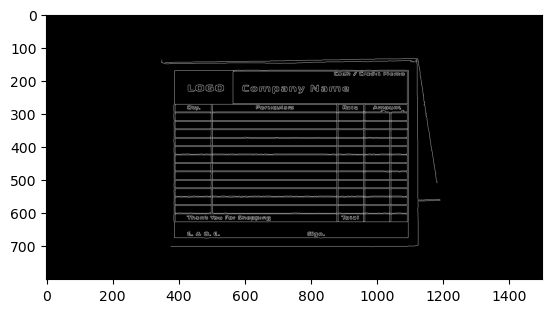

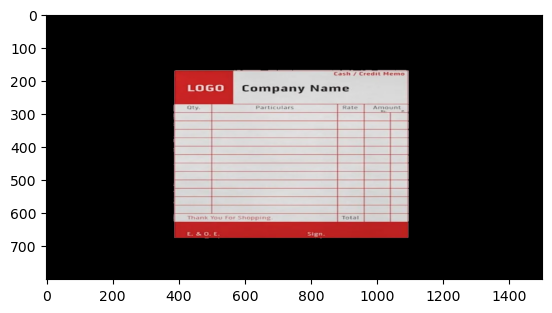

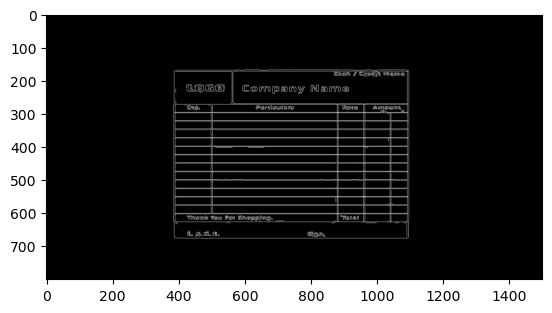

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

im_path = "./neat_bill.jpg"

# Read image from path
img = cv2.imread(im_path)

# Resize the image
img = cv2.resize(img, (1500, 800))

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap="gray")
plt.show()

# Perform edge detection
edges = cv2.Canny(blurred, 30, 100)

plt.imshow(edges, cmap="gray")
plt.show()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Select the contour with the largest area
largest_contour = contours[0]

# Create a mask for the largest contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, [largest_contour], 0, 255, -1)

# Apply the mask to the original image
masked_img = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(masked_img)
plt.show()


# Perform edge detection
edges = cv2.Canny(masked_img, 30, 100)

plt.imshow(edges, cmap="gray")
plt.show()


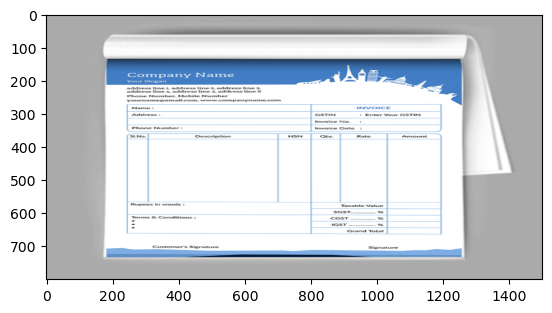

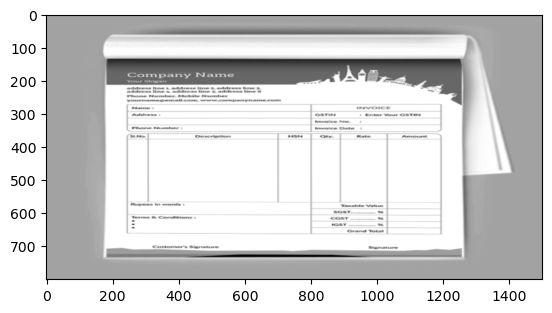

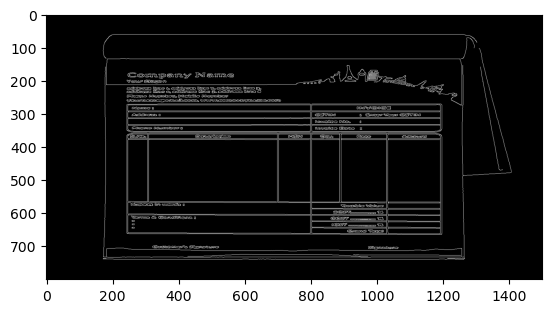

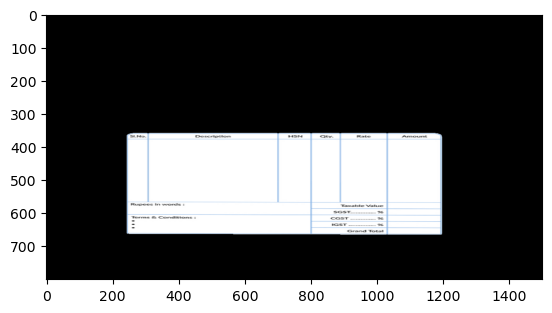

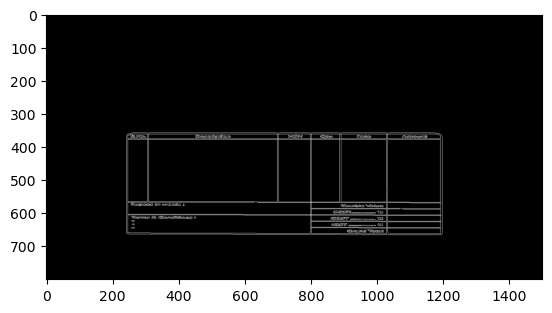

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

im_path = "./a.jpg"

# Read image from path
img = cv2.imread(im_path)

# Resize the image
img = cv2.resize(img, (1500, 800))

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap="gray")
plt.show()

# Perform edge detection
edges = cv2.Canny(blurred, 30, 100)

plt.imshow(edges, cmap="gray")
plt.show()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Select the contour with the largest area
largest_contour = contours[0]

# Create a mask for the largest contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, [largest_contour], 0, 255, -1)

# Apply the mask to the original image
masked_img = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(masked_img)
plt.show()


# Perform edge detection
edges = cv2.Canny(masked_img, 30, 100)

plt.imshow(edges, cmap="gray")
plt.show()


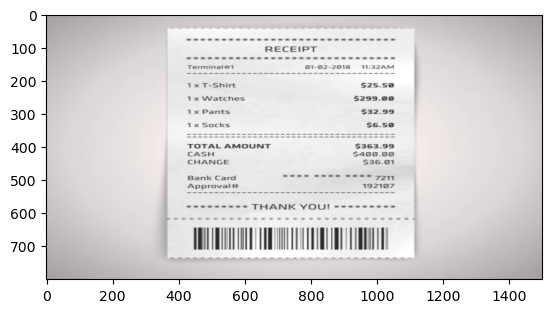

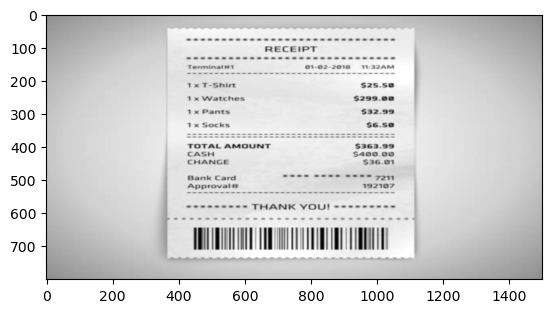

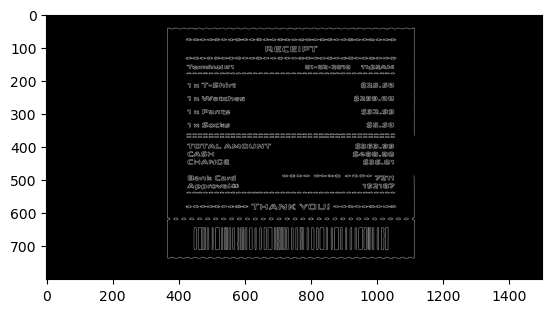

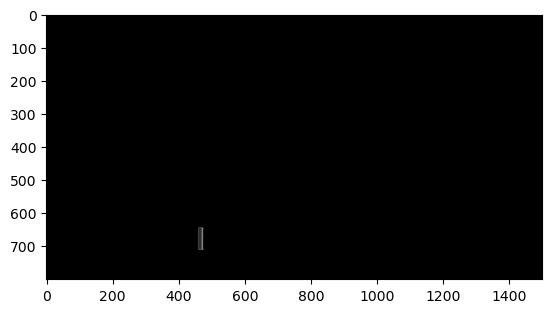

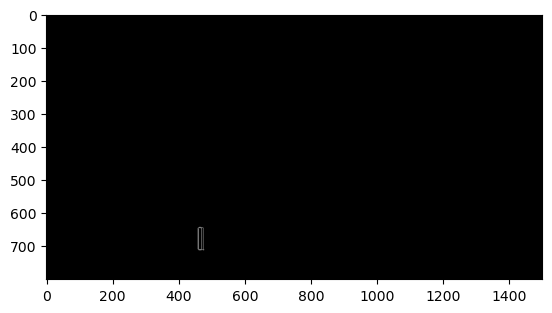

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

im_path = "./receipt.jpg"

# Read image from path
img = cv2.imread(im_path)

# Resize the image
img = cv2.resize(img, (1500, 800))

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap="gray")
plt.show()

# Perform edge detection
edges = cv2.Canny(blurred, 30, 100)

plt.imshow(edges, cmap="gray")
plt.show()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Select the contour with the largest area
largest_contour = contours[0]

# Create a mask for the largest contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, [largest_contour], 0, 255, -1)

# Apply the mask to the original image
masked_img = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(masked_img)
plt.show()


# Perform edge detection
edges = cv2.Canny(masked_img, 30, 100)

plt.imshow(edges, cmap="gray")
plt.show()


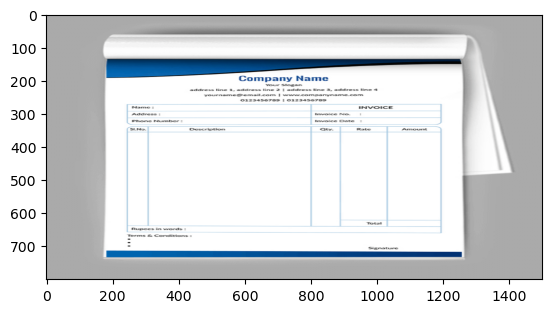

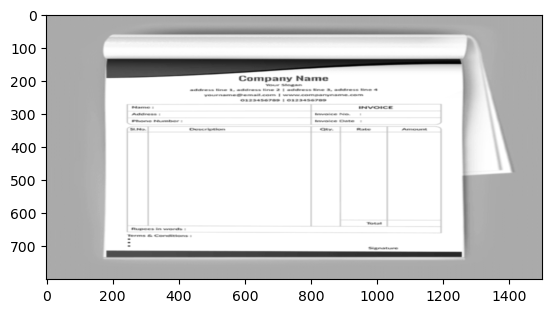

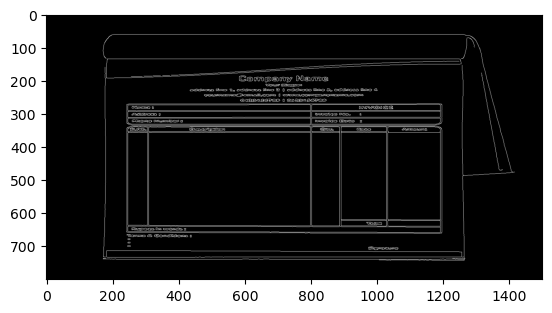

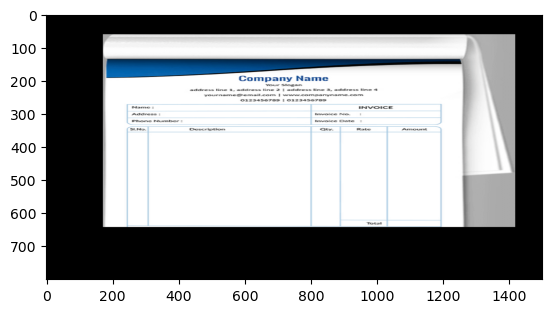

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

im_path = "./billl.jpg"

# Read image from path
img = cv2.imread(im_path)

# Resize the image
img = cv2.resize(img, (1500, 800))

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap="gray")
plt.show()

# Perform edge detection
edges = cv2.Canny(blurred, 30, 100)

plt.imshow(edges, cmap="gray")
plt.show()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the outermost bounding box
x, y, w, h = cv2.boundingRect(contours[0])
for contour in contours:
    cx, cy, cw, ch = cv2.boundingRect(contour)
    if cx < x:
        x = cx
    if cy < y:
        y = cy
    if cx + cw > x + w:
        w = cx + cw - x
    if cy + ch > y + h:
        h = cy + ch - y

# Create a blank mask
mask = np.zeros_like(gray)

# Draw the outermost bounding box on the mask
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

# Apply the mask to the original image
masked_img = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(masked_img)
plt.show()


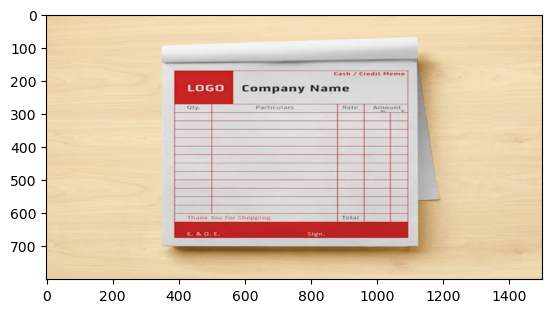

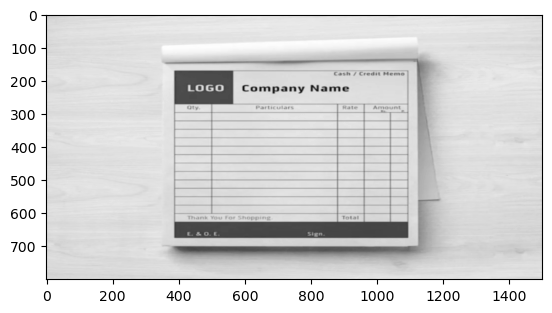

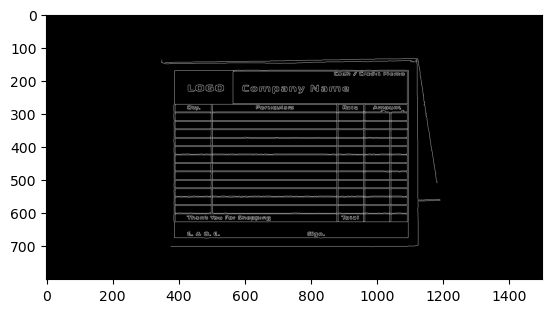

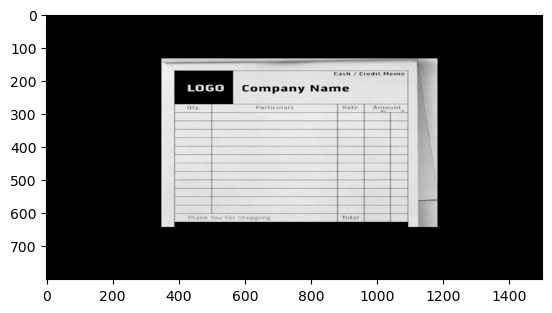

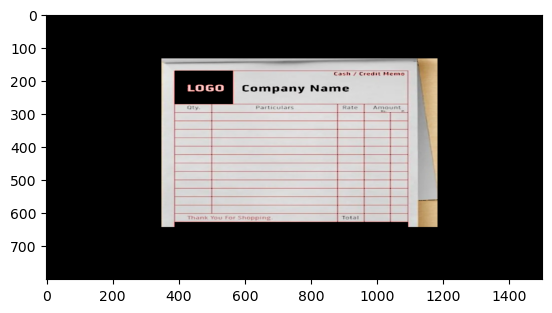

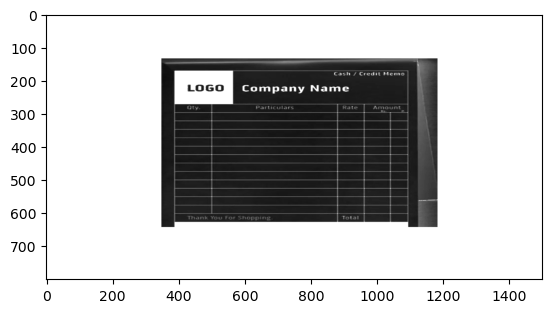

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

im_path = "./neat_bill.jpg"

# Read image from path
img = cv2.imread(im_path)

# Resize the image
img = cv2.resize(img, (1500, 800))

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap="gray")
plt.show()

# Perform edge detection
edges = cv2.Canny(blurred, 30, 100)

plt.imshow(edges, cmap="gray")
plt.show()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the outermost bounding box
x, y, w, h = cv2.boundingRect(contours[0])
for contour in contours:
    cx, cy, cw, ch = cv2.boundingRect(contour)
    if cx < x:
        x = cx
    if cy < y:
        y = cy
    if cx + cw > x + w:
        w = cx + cw - x
    if cy + ch > y + h:
        h = cy + ch - y

# Create a blank mask
mask = np.zeros_like(gray)

# Draw the outermost bounding box on the mask
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

# Apply the mask to the original image
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Convert the masked image to grayscale
masked_gray = cv2.cvtColor(masked_img, cv2.COLOR_RGB2GRAY)

# Threshold the masked gray image
_, thresholded = cv2.threshold(masked_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Apply color to the thresholded image
color1 = cv2.cvtColor(cv2.bitwise_and(img, img, mask=thresholded), cv2.COLOR_RGB2GRAY)
color2 = cv2.bitwise_and(img, img, mask=thresholded)
color3 = cv2.cvtColor(cv2.bitwise_not(cv2.bitwise_and(img, img, mask=thresholded)), cv2.COLOR_RGB2GRAY)

# Display the three color channels
plt.imshow(color1, cmap='gray')
plt.show()

plt.imshow(color2)
plt.show()

plt.imshow(color3, cmap='gray')
plt.show()


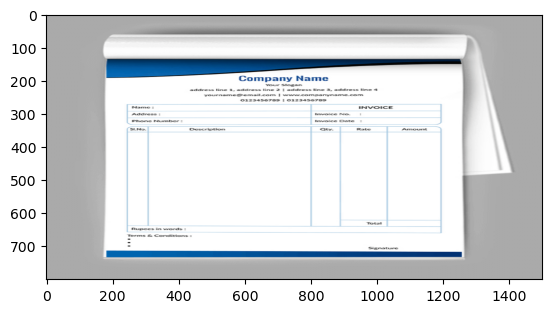

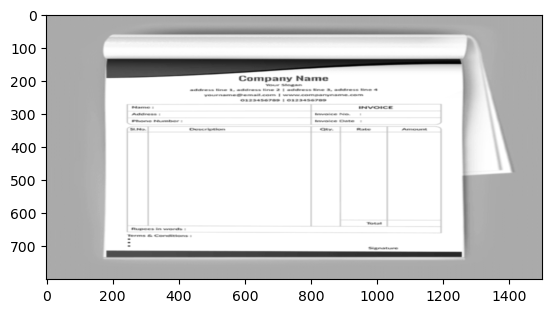

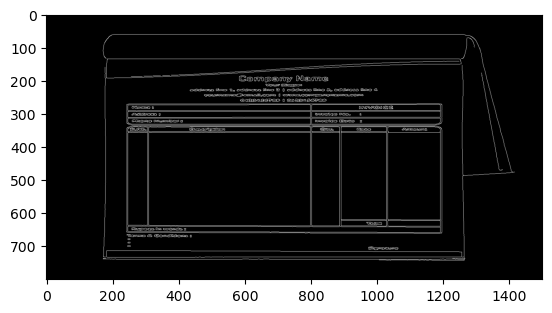

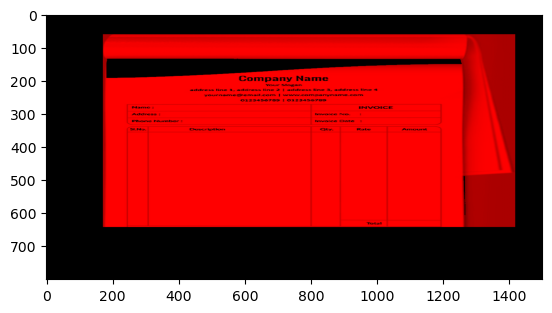

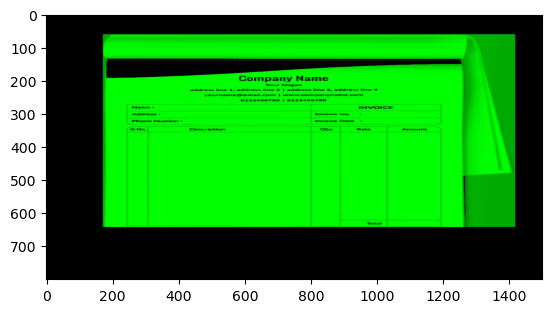

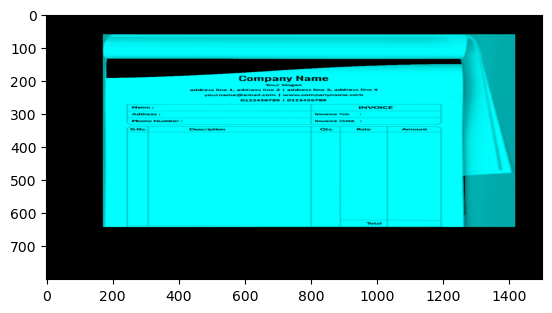

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

im_path = "./billl.jpg"

# Read image from path
img = cv2.imread(im_path)

# Resize the image
img = cv2.resize(img, (1500, 800))

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap="gray")
plt.show()

# Perform edge detection
edges = cv2.Canny(blurred, 30, 100)

plt.imshow(edges, cmap="gray")
plt.show()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the outermost bounding box
x, y, w, h = cv2.boundingRect(contours[0])
for contour in contours:
    cx, cy, cw, ch = cv2.boundingRect(contour)
    if cx < x:
        x = cx
    if cy < y:
        y = cy
    if cx + cw > x + w:
        w = cx + cw - x
    if cy + ch > y + h:
        h = cy + ch - y

# Create a blank mask
mask = np.zeros_like(gray)

# Draw the outermost bounding box on the mask
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

# Apply the mask to the original image
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Convert the masked image to grayscale
masked_gray = cv2.cvtColor(masked_img, cv2.COLOR_RGB2GRAY)

# Threshold the masked gray image
_, thresholded = cv2.threshold(masked_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Apply color to the thresholded image
red_color = cv2.cvtColor(cv2.bitwise_and(img, img, mask=thresholded), cv2.COLOR_RGB2GRAY)
red_color = cv2.cvtColor(red_color, cv2.COLOR_GRAY2RGB)
red_color[:, :, 1:3] = 0  # Set green and blue channels to 0 (red color)

blue_color = cv2.cvtColor(cv2.bitwise_and(img, img, mask=thresholded), cv2.COLOR_RGB2GRAY)
blue_color = cv2.cvtColor(blue_color, cv2.COLOR_GRAY2RGB)
blue_color[:, :, 0] = 0  # Set red channel to 0 (blue color)
blue_color[:, :, 2] = 0  # Set green channel to 0 (blue color)

yellow_color = cv2.cvtColor(cv2.bitwise_and(img, img, mask=thresholded), cv2.COLOR_RGB2GRAY)
yellow_color = cv2.cvtColor(yellow_color, cv2.COLOR_GRAY2RGB)
yellow_color[:, :, 0] = 0  # Set red channel to 0 (yellow color)

# Display the color channels
plt.imshow(red_color)
plt.show()

plt.imshow(blue_color)
plt.show()

plt.imshow(yellow_color)
plt.show()
